# ERT calibration and GF calibration
This notebook explores how ECa values acquired at 1 m using the F-1m calibration can be corrected using ERT calibration.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
sys.path.append('../../pyr2/src')
from resipy import R2
from resipy.meshTools import vtk_import
from emagpy import Problem

datadir = '../src/examples/boxford-calib/'

API path =  /home/pmclachlan/pyr2/src/resipy
ResIPy version =  2.0.2


Working directory is: /media/jkl/data/phd/tmp/emagpy/src/examples/boxford-calib/wd
0/2171 reciprocal measurements found.
Fine Mesh Depth (relative to the surface): 3.00 m
Fine Mesh Depth (relative to the surface): 1.50 m
Creating triangular mesh...Reading mesh.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Triangle
Reading connection matrix...
ignoring 0 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
done
Writing .in file and protocol.dat... done!
--------------------- MAIN INVERSION ------------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.0 <<

 >> D a t e : 05 - 06 - 2020
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat  

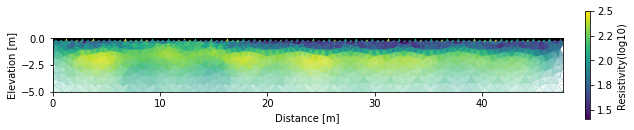

In [12]:
# inverting one line
k1er = R2(datadir + 'wd')
k1er.createSurvey(datadir + 'wd/protocol.dat', ftype='ProtocolDC')
k1er.importElec(datadir + 'wd/elec.csv')
k1er.createMesh('trian', cl=0.5, fmd=5)
k1er.invert()
k1er.getResults()
fig, ax = plt.subplots(figsize=(10,2))
k1er.showResults(ax=ax)

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


gfCorrection: F-1m calibrated ECa converted to LIN ECa
VCP1.48f10000h1: ECa(ERT) = 0.07 * ECa(EMI) +2.07 (R^2=0.38)
VCP2.82f10000h1: ECa(ERT) = 0.18 * ECa(EMI) +2.33 (R^2=0.48)
VCP4.49f10000h1: ECa(ERT) = 0.27 * ECa(EMI) +1.86 (R^2=0.53)
HCP1.48f10000h1: ECa(ERT) = 0.26 * ECa(EMI) +3.41 (R^2=0.36)
HCP2.82f10000h1: ECa(ERT) = 0.50 * ECa(EMI) +1.55 (R^2=0.54)
HCP4.49f10000h1: ECa(ERT) = 0.42 * ECa(EMI) +1.85 (R^2=0.36)
Correction is applied.
gfCorrection: F-1m calibrated ECa converted to LIN ECa
gfCorrection: F-1m calibrated ECa converted to LIN ECa
VCP1.48f10000h1: ECa(ERT) = 0.24 * ECa(EMI) +2.07 (R^2=0.38)
VCP2.82f10000h1: ECa(ERT) = 0.40 * ECa(EMI) +2.33 (R^2=0.48)
VCP4.49f10000h1: ECa(ERT) = 0.48 * ECa(EMI) +1.86 (R^2=0.53)
HCP1.48f10000h1: ECa(ERT) = 0.49 * ECa(EMI) +3.41 (R^2=0.36)
HCP2.82f10000h1: ECa(ERT) = 0.73 * ECa(EMI) +1.55 (R^2=0.54)
HCP4.49f10000h1: ECa(ERT) = 0.59 * ECa(EMI) +1.85 (R^2=0.36)
Correction is applied.
Survey 1/1
43/43 inverted
Survey 1/1
43/43 inverted
Surve

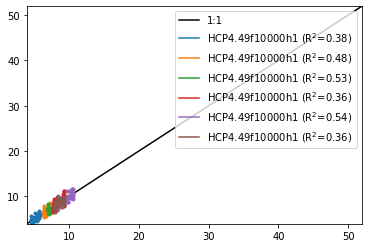

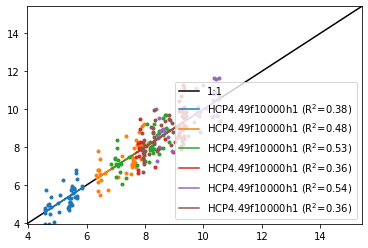

In [2]:
# no correction
k1 = Problem()
k1.createSurvey(datadir + 'eca_raw.csv')

# with GF correction
k2 = Problem()
k2.createSurvey(datadir + 'eca_raw.csv')
k2.gfCorrection(calib='F-1m')

# like if it was collected at 0 m
k3 = Problem()
k3.createSurvey(datadir + 'eca_raw.csv')
k3.hx = np.zeros(6) # make it like data were collected at 0 m

# ERT calibrated but no GF corrected
k4 = Problem()
k4.createSurvey(datadir + 'eca_raw.csv')
k4.calibrate(datadir + 'eca_raw.csv',
             fnameEC=datadir + 'eri_ec.csv',
#              fnameResMod=datadir + 'wd/invdir/f001_res.dat',
             forwardModel='FSlin', apply=True)

# ERT calibrated and GF corrected
k5 = Problem()
k5.createSurvey(datadir + 'eca_raw.csv')
k5.gfCorrection(calib='F-1m')
k5.calibrate(datadir + 'eca_raw.csv',
             fnameEC=datadir + 'eri_ec.csv',
#              fnameResMod=datadir + 'wd/invdir/f001_res.dat',
             forwardModel='FSlin', calib='F-1m', apply=True)

ks = [k1, k2, k3, k4, k5]
for k in ks:
    k.setInit(depths0=np.linspace(0.01, 5, 10))
    k.invert(forwardModel='FSlin', method='Gauss-Newton')

In [14]:
emSens(np.linspace(0,3),s=1.48,coilPosition='vcp')

array([1.        , 0.92068097, 0.84812638, 0.78213571, 0.72239598,
       0.66850875, 0.62002045, 0.57645117, 0.53731902, 0.50215855,
       0.47053309, 0.44204183, 0.41632286, 0.39305333, 0.3719477 ,
       0.35275498, 0.33525537, 0.31925687, 0.30459197, 0.29111448,
       0.2786968 , 0.26722742, 0.25660871, 0.24675506, 0.23759123,
       0.22905095, 0.22107572, 0.21361374, 0.2066191 , 0.20005093,
       0.19387282, 0.18805223, 0.18256001, 0.17736998, 0.17245861,
       0.16780465, 0.16338891, 0.15919402, 0.1552042 , 0.1514051 ,
       0.14778367, 0.14432798, 0.14102713, 0.13787114, 0.13485084,
       0.13195781, 0.12918432, 0.12652321, 0.1239679 , 0.12151229])

array([0.        , 0.06122449, 0.12244898, 0.18367347, 0.24489796,
       0.30612245, 0.36734694, 0.42857143, 0.48979592, 0.55102041,
       0.6122449 , 0.67346939, 0.73469388, 0.79591837, 0.85714286,
       0.91836735, 0.97959184, 1.04081633, 1.10204082, 1.16326531,
       1.2244898 , 1.28571429, 1.34693878, 1.40816327, 1.46938776,
       1.53061224, 1.59183673, 1.65306122, 1.71428571, 1.7755102 ,
       1.83673469, 1.89795918, 1.95918367, 2.02040816, 2.08163265,
       2.14285714, 2.20408163, 2.26530612, 2.32653061, 2.3877551 ,
       2.44897959, 2.51020408, 2.57142857, 2.63265306, 2.69387755,
       2.75510204, 2.81632653, 2.87755102, 2.93877551, 3.        ])

In [5]:
def emSens(depths,s,coilPosition, hx=0, rescaled=False):
    """return mcNeil senstivity values
    
    depths (positive and increasing with depth)
    s = distance between coils
    coilPosition is "hcp" for horizontal coplanar (HCP) and "vcp" for VCP
    x = range on which compute the sensitivity (array_like)
     """
    depths = depths + np.abs(hx)
    z=np.array(depths)/s
    # from mcNeil 1980 in Callegary2007
    if coilPosition == 'hcp':
        cs = 1/np.sqrt(4*z**2+1)
    if coilPosition == 'vcp':
        cs = np.sqrt(4*z**2+1)-2*z
    if coilPosition == 'prp':
        cs = 1-2*z/np.sqrt(4*z**2 + 1)
    
    if (hx != 0) and rescaled is True: # rescale the cumulative sensitivity so that it reaches 1
        cs = cs/cs[0]

    return cs # all but the first one as it is just use to scale everything

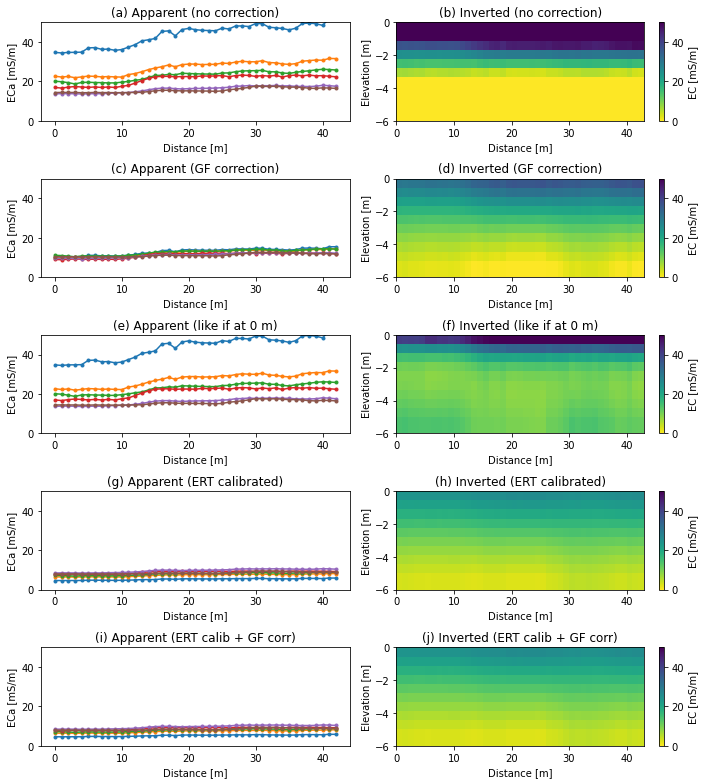

In [47]:
# figure
fig, axs = plt.subplots(len(ks), 2, figsize=(10,11))
letters = ['a','b','c','d','e','f','g','h','i','j']
labs = ['no correction', 'GF correction', 'like if at 0 m', 'ERT calibrated', 'ERT calib + GF corr']
for i, k in enumerate(ks):
    k.show(ax=axs[i,0], vmin=0, vmax=50)
    axs[i,0].get_legend().remove()
    axs[i,0].set_title('({:s}) Apparent ({:s})'.format(letters[i*2], labs[i]))
    k.showResults(ax=axs[i,1], vmin=0, vmax=50)
    axs[i,1].set_title('({:s}) Inverted ({:s})'.format(letters[i*2+1], labs[i]))

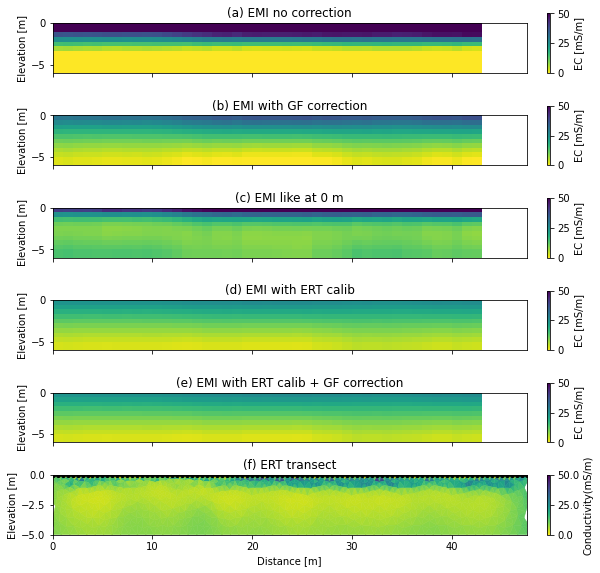

In [48]:
# comparing with ERT
vmin, vmax = 0, 50
fig, axs = plt.subplots(6, 1, figsize=(8,8), sharex=True, sharey=False)
ax = axs[0]
k1.showResults(ax=ax, vmin=vmin, vmax=vmax)
ax.set_title('(a) EMI no correction')
ax.set_xlabel('')
ax = axs[1]
k2.showResults(ax=ax, vmin=vmin, vmax=vmax)
ax.set_title('(b) EMI with GF correction')
ax.set_xlabel('')
ax = axs[2]
k3.showResults(ax=ax, vmin=vmin, vmax=vmax)
ax.set_title('(c) EMI like at 0 m')
ax.set_xlabel('')
ax = axs[3]
k4.showResults(ax=ax, vmin=vmin, vmax=vmax)
ax.set_title('(d) EMI with ERT calib')
ax.set_xlabel('')
ax = axs[4]
k5.showResults(ax=ax, vmin=vmin, vmax=vmax)
ax.set_title('(e) EMI with ERT calib + GF correction')
ax.set_xlabel('')
ax = axs[5]
k1er.showResults(ax=ax, attr='Conductivity(mS/m)', vmin=vmin, vmax=vmax,
                 sens=False, color_map='viridis_r')
ax.set_title('(f) ERT transect')

# adjust the x axis of subplot 1 to match the others
pos = axs[-1].get_position()
cbar0 = fig.axes[-1].get_position()
for i, ax in enumerate(axs[:-1]):
    pos0 = ax.get_position()
    ax.set_position([pos0.x0, pos0.y0, pos.width, pos.height])
    cbar = fig.axes[len(axs) + i]
    pos1 = cbar.get_position()
    cbar.set_position([cbar0.x0, pos1.y0, pos1.width, pos1.height])

for ax in axs:
    ax.set_aspect('auto')

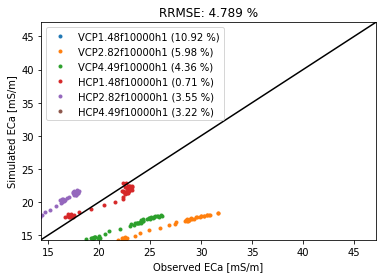

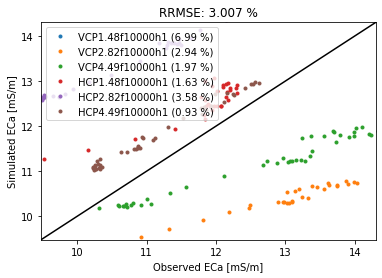

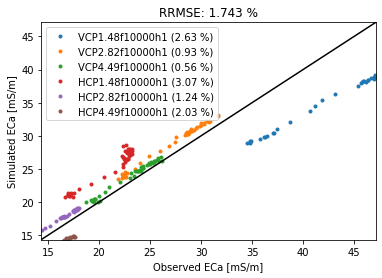

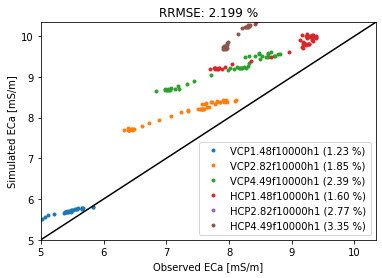

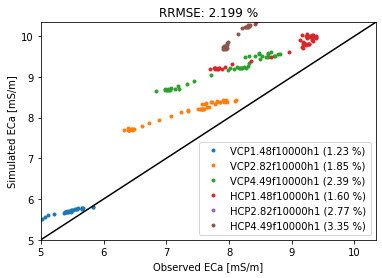

In [49]:
for k in ks:
    k.showOne2one()

## Conclusions
- Applying the ERT calibration alone is sufficient to account for GF calibration as well
- Applying the GF correction and then the ERT calibration leads to the same results as just applying the ERT calibration alone
- Hence, if ERT data are available, we recommend to just apply the ERT correction alone and not the GF calibration.